# 导包
random：随机梯度下降，随机初始化权重 
<br>%matplotlib inline：生成的图表直接嵌入到 Notebook 的输出区域中显示 

In [41]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt
from d2l import torch as d2l


# 构造人造数据集
## 主要就是把这个函数实现
其好书就是知道真实的$w$和$b$<br>
$y=Xw+b+\epsilon$

In [42]:
def synthetic_data(w, b, num_example):
    x = torch.normal(0, 1, (num_example, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

## 验证，看一看数据集长什么样
### 打印出来向量看
答：第零个样本是长为2的向量，标号是一个标量

In [43]:
print('features:', features[0], '\nlabel:',labels[0])

features: tensor([ 0.9519, -1.0867]) 
label: tensor([9.8099])


#### 可视化数据看
给他们画出来<span style = "color : blue">（这里要学习画图！！！）</span>

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),labels.detach().numpy(), 1)

代替上面的代码

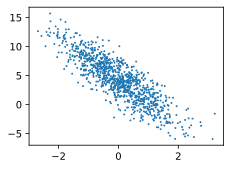

In [45]:
plt.rcParams['figure.figsize'] = (3.5, 2.5)  # 替代 d2l.set_figsize()
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), s=1)
plt.show()  # 显示图表

## 读取数据集

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随即读取没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

# 初始化模型参数

In [47]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义模型

In [48]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

> 有了模型之后我们就需要定义损失函数
# 定义损失函数

In [49]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# 定义优化算法

In [50]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# 训练

In [53]:
lr = 10
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch:{epoch + 1}, loss:{float(train_l.mean()):f}')

epoch:1, loss:nan
epoch:2, loss:nan
epoch:3, loss:nan
